# Churn Rate prediction for Credit Card Customers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sklearn
print(f'SkLearn {sklearn.__version__}\nNumpy {np.__version__}\nPandas {pd.__version__}')

SkLearn 1.0.2
Numpy 1.21.5
Pandas 1.4.2


# Importing the Data

Link to the Kaggle dataset
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

In [2]:
#change to make it work on any device (use API)
path = "C:\\Users\\carlo\\Desktop\\MACHINE LEARNING\\DATASETS\\churn\\BankChurners.csv"
cst = pd.read_csv(path)


In [3]:
#dropping useless features (partly based on file description found on Kaggle)
cst.drop(['Avg_Utilization_Ratio','Months_on_book','Avg_Open_To_Buy','CLIENTNUM'],axis = 1, inplace = True)
cst.drop([cst.columns[-1], cst.columns[-2]],axis = 1,inplace = True)

# Visualizing the Data

In [63]:
cst.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,777,1.335,1144,42,1.625
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,1,2,8256.0,864,1.541,1291,33,3.714
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0,3418.0,0,2.594,1887,20,2.333
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3,4,1,3313.0,2517,1.405,1171,20,2.333
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,4716.0,0,2.175,816,28,2.500


Issues:
1. data is not standardized
2. many categorical features to be encoded
3. output is categorical

In [64]:
pd.DataFrame(cst.columns, columns = ['Attributes'])

,Attributes
0,Attrition_Flag
1,Customer_Age
2,Gender
3,Dependent_count
4,Education_Level
5,Marital_Status
6,Income_Category
7,Card_Category
8,Total_Relationship_Count
9,Months_Inactive_12_mon


In [65]:
cst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 14  Total_

No missing values, however by further inspection one can notice that missing values are simply replace by a string whose value is 'Unknown'

In [66]:
cst['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [67]:
cst['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [4]:
from sklearn.preprocessing import FunctionTransformer


# could simply use replace on the dataset, wanted to 
# experiment with pipelines

def replace_unks(X, columns, vals):
    for col,val in zip(columns, vals):
        X[col].replace(val, np.nan, inplace = True)
    return X

# replaces specific values from specific columns with np.nan

unk_to_nan = FunctionTransformer(replace_unks, kw_args = {'columns': ['Education_Level','Income_Category'], 'vals':['Unknown', 'Unknown']})


In [5]:
#FIXED (CURRENTLY RUNNING ON SKLEARN 1.0+)

unk_to_nan.fit_transform(cst)

# on sklearn <0.24, one needs to impute unknowns to a numerical
# value and then replace with Nans and impute/drop

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,777,1.335,1144,42,1.625
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,1,2,8256.0,864,1.541,1291,33,3.714
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0,3418.0,0,2.594,1887,20,2.333
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3,4,1,3313.0,2517,1.405,1171,20,2.333
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,4716.0,0,2.175,816,28,2.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,3,2,3,4003.0,1851,0.703,15476,117,0.857
10123,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,4,2,3,4277.0,2186,0.804,8764,69,0.683
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,5,3,4,5409.0,0,0.819,10291,60,0.818
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,4,3,3,5281.0,0,0.535,8395,62,0.722


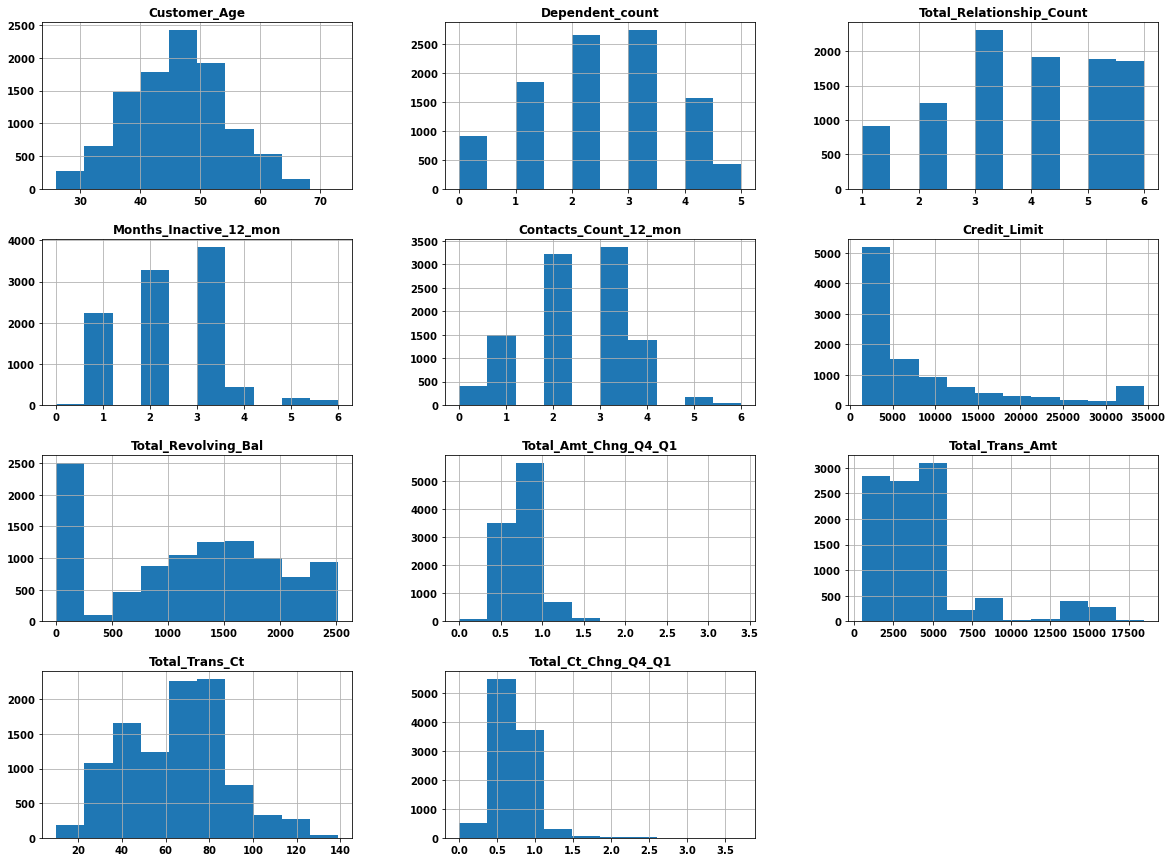

In [6]:
cst.hist(figsize = (20,15))
plt.show()

# Train/Test split

In [12]:
from sklearn.model_selection import train_test_split

cst_train, cst_test = train_test_split(cst, test_size = 0.2, random_state = 42)

# might try stratified by first categorizing income classes,
# will see after checking feature importance


train_labels = cst_train.pop('Attrition_Flag')


# test = train_labels.to_numpy().copy() ???????

# Encoding Output

I want Attrited Customers (those who quit their subscription) to be encoded with the value 1

In [13]:
labels_vals = [['Existing Customer', 'Attrited Customer']]

In [14]:
from sklearn.preprocessing import OrdinalEncoder

labels_enc = OrdinalEncoder(categories = labels_vals)
train_labels = labels_enc.fit_transform(train_labels.to_numpy().reshape(-1,1))
train_labels = train_labels.ravel()
train_labels

array([0., 1., 0., ..., 0., 0., 0.])

# Handling Categoricals

In [26]:
cst_cat = cst_train.select_dtypes(include = object).copy()

#marital status will be classifed through a one-hot classifier
mar_st = cst_cat.pop('Marital_Status')

cols_cat = list(cst_cat.columns)

Rationale for my choice of encoders:
* Gender is binary, hence Ordinal works fine. The value set to one is irrelevant.
* Education Level is divided in increasing levels, hence Ordinal is necessary to keep that into account. The same goes for Income Category and Card Category

In [27]:
cst_cat.head()

,Gender,Education_Level,Income_Category,Card_Category
9066,F,NaN,NaN,Blue
5814,F,High School,NaN,Blue
792,F,NaN,Less than $40K,Gold
1791,F,Graduate,Less than $40K,Blue
5011,F,High School,$40K - $60K,Blue


### Ordinal Encoding

In [28]:
#defining categories manually allows me to choose how the values are mapped
categories = [
 ['M', 'F'],
 ['Uneducated','High School','College',  'Graduate',  'Post-Graduate','Doctorate',np.nan],
 ['Less than $40K','$40K - $60K', '$60K - $80K', '$80K - $120K','$120K +',np.nan],
 ['Blue', 'Silver', 'Gold', 'Platinum']]

In [29]:
# creating instance of OrdinalEncoder
ord_enc = OrdinalEncoder(categories = categories)

# fitting the train set and applying the encoder
cst_cat_transformed = ord_enc.fit_transform(cst_cat)

# this is just to visualize the effects
cst_cat_transformed = pd.DataFrame(cst_cat_transformed, columns = cols_cat, index = cst_cat.index)
cst_cat_transformed.head()

,Gender,Education_Level,Income_Category,Card_Category
9066,1.0,NaN,NaN,0.0
5814,1.0,1.0,NaN,0.0
792,1.0,NaN,0.0,2.0
1791,1.0,3.0,0.0,0.0
5011,1.0,1.0,1.0,0.0


### One-Hot Encoding

In [30]:
# trick to make the encoder work with only one feature (FIX?)
mar_st_array = mar_st.to_numpy().reshape(-1,1)

In [32]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of the encoder
ohe = OneHotEncoder(categories = [['Married','Single','Divorced']],sparse = False, handle_unknown = 'ignore')

#fitting and transformation
mar_st_1hot_array = ohe.fit_transform(mar_st_array)


# visualization
mar_st_1hot = pd.DataFrame(mar_st_1hot_array, columns = list(ohe.categories_), index = mar_st.index)
mar_st_1hot.head()

,Married,Single,Divorced
9066,0.0,1.0,0.0
5814,1.0,0.0,0.0
792,0.0,1.0,0.0
1791,0.0,1.0,0.0
5011,1.0,0.0,0.0


# Handling Missing Values

Since a lot of useful info would be lost by simply getting rid of missing values, I decided to simply replace them with the median

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
cst_cat_transformed = pd.DataFrame(imputer.fit_transform(cst_cat_transformed),columns = cols_cat, index = cst_cat.index)

print(f'imputer strategy: {imputer.strategy}')
cst_cat_transformed.info()

imputer strategy: median
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 9066 to 7270
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8101 non-null   float64
 1   Education_Level  8101 non-null   float64
 2   Income_Category  8101 non-null   float64
 3   Card_Category    8101 non-null   float64
dtypes: float64(4)
memory usage: 316.4 KB


# Creating a Pipeline

* ### Pipeline for ordinal categoricals:
    1. transform to numeric
    2. impute NaNs to median
   
* ### Pipeline for one-hot categoricals:
    1. transform to multiple attributes 
       (ignore unknowns)


In [36]:
#I used this just for testing

def do_nothing(X):
    return X

null_transformer = FunctionTransformer(do_nothing)

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#selecting attributes that are processed differently
cst_num = cst.select_dtypes(include = [np.number])
num_attribs = list(cst_num)
cat_ord_attribs = list(cst_cat)
cat_1h_attribs = ['Marital_Status']


# pipeline for ordinal categoricals
ord_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(categories = categories)),
    ('imputer', SimpleImputer(strategy = 'median'))
])


# full pipeline:
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_attribs),
    ('ord', ord_pipeline, cat_ord_attribs),
    ('1hot', OneHotEncoder(categories = [['Married','Single','Divorced']],sparse = False, handle_unknown = 'ignore'), cat_1h_attribs)  
])




## Testing the Pipeline

In [38]:
cst_prepared = cst_train.copy()
cst_prepared.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
9066,54,F,1,NaN,Single,NaN,Blue,1,3,3,3723.0,1728,0.595,8554,99,0.678
5814,58,F,4,High School,Married,NaN,Blue,1,4,3,5396.0,1803,0.493,2107,39,0.393
792,45,F,4,NaN,Single,Less than $40K,Gold,6,1,3,15987.0,1648,0.732,1436,36,1.250
1791,34,F,2,Graduate,Single,Less than $40K,Blue,4,3,4,3625.0,2517,1.158,2616,46,1.300
5011,49,F,2,High School,Married,$40K - $60K,Blue,5,3,4,2720.0,1926,0.602,3806,61,0.794


In [39]:
cst_prepared = full_pipeline.fit_transform(cst_prepared)
cst_prepared

array([[ 0.95906107, -1.03512207, -1.81295159, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.45768789,  1.29138969, -1.81295159, ...,  1.        ,
         0.        ,  0.        ],
       [-0.16284927,  1.29138969,  1.40923376, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.53681938,  1.29138969, -0.52407745, ...,  0.        ,
         0.        ,  0.        ],
       [-0.78613279,  0.51588577,  0.12035962, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.83440437,  1.29138969,  0.76479669, ...,  0.        ,
         1.        ,  0.        ]])

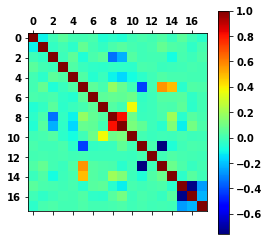

In [40]:
corr_m = pd.DataFrame(cst_prepared).corr()
plt.matshow(corr_m, cmap = 'jet')
plt.colorbar()

In [42]:
# Some features are highly correlated, fix???

# Model Selection

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# also try svm!!!
from sklearn.calibration import CalibratedClassifierCV as calib_clf


In [45]:
# TODO: add explanation for choice of classifier
rf_clf = RandomForestClassifier()
prob_clf = calib_clf(base_estimator = rf_clf, method = 'sigmoid', cv = 5)

prob_clf.fit(cst_prepared, train_labels)


CalibratedClassifierCV(base_estimator=RandomForestClassifier(), cv=5)

In [46]:
#TODO
    #gridsearch on the hyper-parameters? randomsearch?

# Classification

In [172]:
#features
cst_test_prepared = cst_test.copy()
#labels
test_labels = cst_test_prepared.pop('Attrition_Flag')

In [191]:
#encoding labels
test_labels = labels_enc.fit_transform(test_labels.to_numpy().reshape(-1,1))
test_labels = test_labels.ravel()
test_labels

array([0., 0., 0., ..., 0., 0., 0.])

In [174]:
#processing features
cst_test_prepared = full_pipeline.fit_transform(cst_test_prepared)
cst_test_prepared

array([[ 0.19963272,  0.45562541,  0.12145272, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.57575857, -1.04290882,  0.76057793, ...,  0.        ,
         1.        ,  0.        ],
       [-1.17649312, -0.2936417 ,  0.12145272, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.30077668, -1.04290882, -1.79592291, ...,  0.        ,
         0.        ,  1.        ],
       [-2.42751662, -1.79217594,  1.39970314, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92628842, -1.79217594, -1.79592291, ...,  0.        ,
         1.        ,  0.        ]])

In [186]:
#running the model
predictions = prob_clf.predict(cst_test_prepared)

# Performance Assessement

## Manual

In [193]:
#my accuracy
np.sum(predictions == test_labels)/predictions.shape

array([0.96495558])

In [195]:
#accuracy with a stupid classifier
1-(np.sum(test_labels)/predictions.shape)

array([0.83859822])

## Precision and Recall

In [201]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [198]:
# % predicted positives that are actually positives
precision_score(test_labels, predictions)

0.9155844155844156

In [199]:
# % positives that are "found" (predicted correctly)
recall_score(test_labels, predictions)

0.8623853211009175

## Advanced Metrics

In [202]:
# combined statistic
f1_score(test_labels, predictions)

0.8881889763779528